In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import acquire_exoplanet_data as aed

## General Data Shape and Information

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = aed()
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32552 entries, 0 to 32551
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hostname         32552 non-null  object 
 1   pl_letter        32552 non-null  object 
 2   sy_snum          32552 non-null  int64  
 3   sy_pnum          32552 non-null  int64  
 4   cb_flag          32552 non-null  int64  
 5   discoverymethod  32552 non-null  object 
 6   disc_year        32552 non-null  int64  
 7   glat             32552 non-null  float64
 8   glon             32552 non-null  float64
 9   pl_orbper        29747 non-null  float64
 10  sy_gaiamag       31884 non-null  float64
 11  pl_controv_flag  32552 non-null  int64  
 12  pl_dens          1626 non-null   float64
 13  pl_rade          22711 non-null  float64
 14  pl_ratdor        15519 non-null  float64
 15  pl_masse         2781 non-null   float64
 16  st_teff          30688 non-null  float64
 17  st_met      

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate
0,Kepler-11,c,1,6,0,Transit,2010,8.13328,76.1613,13.02502,13.7062,0,NaN,3.15,NaN,13.5,5680.0,0.0,NaN,4.3,8.0,0.95,NaN,1.1,646.346,2014-05-16
1,Kepler-11,f,1,6,0,Transit,2010,8.13328,76.1613,46.68876,13.7062,0,NaN,2.61,NaN,2.3,5680.0,0.0,NaN,4.3,8.0,0.95,NaN,1.1,646.346,2014-05-16


##### There are a lot more rows here than the previous dataset.  I know that ~5k exoplanets have been discovered so this dataset represents 6x this number of observations.  Many might be duplicates.

For example:

In [4]:
df[df.hostname == 'Kepler-11']
df[df.hostname == 'Kepler-11'].groupby(df.pl_letter).mean()

,sy_snum,sy_pnum,cb_flag,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist
pl_letter,,,,,,,,,,,,,,,,,,,,,,
b,1.0,6.0,0.0,2010.0,8.13328,76.1613,10.304021,13.7062,0.0,1.720,1.836800,19.009833,3.1700,5726.461538,0.032000,0.12,4.355833,7.655,0.975385,1.122411,1.082857,646.346
c,1.0,6.0,0.0,2010.0,8.13328,76.1613,13.024819,13.7062,0.0,0.660,2.937400,22.338833,6.0975,5726.461538,0.032000,0.12,4.355833,7.655,0.975385,1.135256,1.082857,646.346
d,1.0,6.0,0.0,2010.0,8.13328,76.1613,22.686738,13.7062,0.0,1.140,3.248000,32.427000,6.8280,5726.461538,0.032000,0.12,4.355833,7.655,0.970000,1.141522,1.082857,646.346
e,1.0,6.0,0.0,2010.0,8.13328,76.1613,31.996432,13.7062,0.0,0.590,4.084273,51.271167,7.4940,5718.666667,0.027778,0.12,4.356364,7.655,0.963846,2.277438,1.079231,646.346
f,1.0,6.0,0.0,2010.0,8.13328,76.1613,46.686430,13.7062,0.0,0.595,2.606636,47.471667,2.0960,5726.461538,0.032000,0.12,4.355833,7.655,0.970000,0.956000,1.082857,646.346
g,1.0,6.0,0.0,2010.0,8.13328,76.1613,118.378708,13.7062,0.0,4.000,3.467444,97.125000,116.7100,5726.461538,0.032000,0.12,4.355833,7.655,0.980000,1.130167,1.085385,646.346


As such, I will try and pull the duplicates leaving the row with the most information, or possibly combining information.

In [5]:
df['planet'] = df.hostname + '-' + df.pl_letter
df.planet.nunique()

5044

In [6]:
df.groupby(df.planet).mean().sample(2)

,sy_snum,sy_pnum,cb_flag,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist
planet,,,,,,,,,,,,,,,,,,,,,,
Kepler-1850-b,1.0,1.0,0.0,2021.0,15.45157,74.42563,1.385790,14.0882,0.0,NaN,0.578167,6.1478,NaN,4254.714286,-0.232000,-0.810,4.665714,13.800,0.611429,2.498233,0.607143,250.199
Kepler-1107-b,1.0,1.0,0.0,2016.0,10.92346,71.50234,0.571039,14.1282,0.0,NaN,1.412857,3.6587,NaN,5172.628750,0.179833,-0.417,4.525714,9.185,0.848571,3.376220,0.826250,428.798


I can probably group these by the mean and do a decent enough job imputing NaN value.  However there might be another way...

In [7]:
df[df.planet == 'Kepler-1308-b'].sort_values(by='rowupdate')

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet
11851,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104316,14.4744,0,NaN,0.960,7.30,NaN,3696.0,NaN,NaN,4.76,13.80,0.49,NaN,0.48,112.705,2013-10-28,Kepler-1308-b
25877,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104338,14.4744,0,NaN,0.520,14.78,NaN,3410.0,0.00,NaN,4.91,NaN,0.35,13.7994,0.34,112.705,2014-11-18,Kepler-1308-b
4350,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104338,14.4744,0,NaN,0.520,14.78,NaN,3410.0,0.00,NaN,4.91,NaN,0.35,13.7994,0.34,112.705,2014-11-21,Kepler-1308-b
11444,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104338,14.4744,0,NaN,0.520,14.78,NaN,3410.0,0.00,NaN,4.91,NaN,0.35,13.7994,0.34,112.705,2015-08-25,Kepler-1308-b
1515,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104338,14.4744,0,NaN,0.520,NaN,NaN,3468.0,-0.13,NaN,4.92,3.72,0.35,NaN,0.34,112.705,2016-05-06,Kepler-1308-b
9518,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104335,14.4744,0,NaN,0.790,7.58,NaN,3605.0,0.07,NaN,4.84,NaN,0.47,1.8607,0.43,112.705,2017-05-08,Kepler-1308-b
23797,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,NaN,14.4744,0,NaN,0.886,NaN,NaN,3628.0,NaN,NaN,NaN,NaN,NaN,NaN,0.48,112.705,2018-09-04,Kepler-1308-b
12504,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104335,14.4744,0,NaN,NaN,NaN,NaN,3505.0,NaN,-1.503,4.75,NaN,0.48,6.0717,0.48,112.705,2018-09-25,Kepler-1308-b
16643,Kepler-1308,b,1,1,0,Transit,2016,14.28248,69.20767,2.104341,14.4744,0,NaN,NaN,NaN,NaN,3505.0,NaN,-1.503,4.75,NaN,0.48,6.0717,0.48,112.705,2019-04-16,Kepler-1308-b


For a better impute, I would create a script that would go through each planet grouping by date (convert rowupdate to datetime) and apply all values to the final grouped 

1. convert rowupdate to datetime object
2. for plnt in df.planet.rows:
     a = df[df.planet == 'plnt'].sort_values(by='rowupdate', desc)
     for col in a:
         *maybe create a new column that indicates this is the complete column that has the values being imputed to it

##### For now, will use mean a bit later.

##### Quick Null counts before univariate

In [8]:
def column_null_analyzer(df):
    dict_list = []
    for col in df.columns:
        col_nulls = df[col].isnull().sum()
        col_null_percent = col_nulls/len(df.index)
        dict_list.append({'':col,'num_rows_missing':col_nulls,'pct_rows_missing':col_null_percent})
    return pd.DataFrame(dict_list).set_index('').sort_values(by='num_rows_missing', ascending=False)

In [9]:
column_null_analyzer(df)

,num_rows_missing,pct_rows_missing
,,
pl_dens,30926,0.950049
pl_masse,29771,0.914567
st_age,25877,0.794943
st_lum,24126,0.741153
pl_ratdor,17033,0.523255
st_dens,13228,0.406365
st_met,11365,0.349134
pl_rade,9841,0.302316
st_logg,5394,0.165704


## Let's Start some Univariate Analysis to help make some cleanup decisions

I want to convert date first so that I can get a distribution on it.

In [10]:
df.rowupdate = pd.to_datetime(df.rowupdate)

In [11]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols, num_cols

(['hostname', 'pl_letter', 'discoverymethod', 'planet'],
 ['sy_snum',
  'sy_pnum',
  'cb_flag',
  'disc_year',
  'glat',
  'glon',
  'pl_orbper',
  'sy_gaiamag',
  'pl_controv_flag',
  'pl_dens',
  'pl_rade',
  'pl_ratdor',
  'pl_masse',
  'st_teff',
  'st_met',
  'st_lum',
  'st_logg',
  'st_age',
  'st_mass',
  'st_dens',
  'st_rad',
  'sy_dist',
  'rowupdate'])

In [12]:
df[df.pl_controv_flag == 1]

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet
80,HD 40307,g,1,5,0,Radial Velocity,2013,-30.34064,268.81455,197.800000,6.84367,1,NaN,NaN,NaN,NaN,4956.00,-0.310,-0.639,4.47,4.500,0.77,NaN,NaN,12.93630,2014-05-14,HD 40307-g
120,GJ 667 C,g,3,5,0,Radial Velocity,2013,1.41002,351.84167,256.200000,9.38033,1,NaN,NaN,NaN,NaN,3350.00,-0.550,-1.863,4.69,2.000,0.33,NaN,NaN,7.24396,2014-05-14,GJ 667 C-g
529,HD 40307,g,1,5,0,Radial Velocity,2013,-30.34064,268.81455,196.343000,6.84367,1,NaN,NaN,NaN,NaN,4867.44,-0.323,-0.585,4.63,NaN,0.79,3.0256,0.72,12.93630,2015-08-26,HD 40307-g
1376,HD 100546,b,1,1,0,Imaging,2014,-8.32378,296.36705,NaN,6.65514,1,NaN,77.342,NaN,NaN,10500.00,NaN,1.500,NaN,0.005,2.40,NaN,NaN,109.67700,2015-05-14,HD 100546-b
1539,Kepler-186,f,1,5,0,Transit,2014,8.17058,78.51990,129.945770,14.59940,1,NaN,1.120,NaN,NaN,3871.00,-0.310,NaN,4.76,3.890,0.51,NaN,0.49,177.59400,2016-05-06,Kepler-186-f
1678,Kepler-452,b,1,1,0,Transit,2015,9.98768,77.86464,384.843022,13.40480,1,NaN,1.500,NaN,NaN,5892.00,0.000,NaN,4.40,3.550,1.03,NaN,1.06,551.72700,2016-05-06,Kepler-452-b
2112,HD 219134,f,1,6,0,Radial Velocity,2015,-3.20073,109.90724,22.717000,5.24020,1,NaN,1.310,NaN,7.300,4699.00,0.110,-0.577,4.57,11.000,0.81,2.4380,0.78,6.53127,2017-03-14,HD 219134-f
3731,LkCa 15,c,1,2,0,Imaging,2015,-15.98175,176.68976,NaN,11.58870,1,NaN,NaN,NaN,NaN,4194.00,NaN,NaN,NaN,NaN,NaN,NaN,1.61,158.15200,2015-12-02,LkCa 15-c
4140,rho CrB,b,1,2,0,Radial Velocity,1997,48.92412,53.48367,39.645000,5.24167,1,NaN,NaN,NaN,NaN,5777.00,-0.190,NaN,NaN,10.000,1.00,NaN,1.31,17.46710,2016-10-26,rho CrB-b
4177,GJ 15 A,b,2,2,0,Radial Velocity,2014,-18.44687,116.69017,11.443300,7.21620,1,NaN,NaN,NaN,NaN,3567.00,-0.320,-1.663,4.90,NaN,0.38,NaN,0.39,3.56228,2019-10-02,GJ 15 A-b


Having nulls was cuasing issues so created an exploratory dataframe with all nulls dropped:

sy_snum


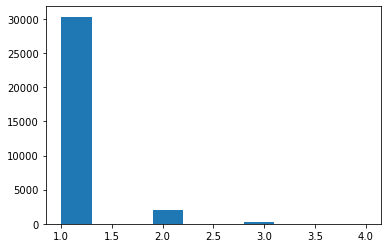

1    30323
2     1994
3      231
4        4
Name: sy_snum, dtype: int64

-----

sy_pnum


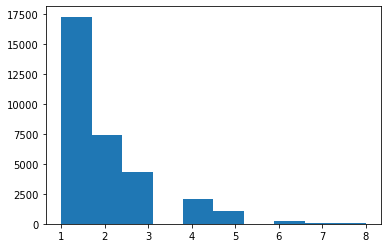

1    17310
2     7404
3     4354
4     2070
5     1052
6      274
8       62
7       26
Name: sy_pnum, dtype: int64

-----

cb_flag


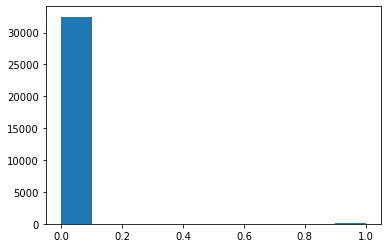

0    32481
1       71
Name: cb_flag, dtype: int64

-----

disc_year


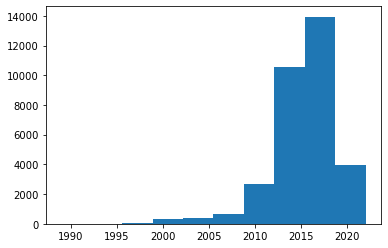

2016    12718
2014     8822
2021     2553
2012      945
2013      920
2011      913
2015      794
2018      792
2020      739
2010      478
2017      428
2019      403
2009      349
2008      273
2007      260
2022      232
2004      157
2005      144
2002      133
2006      132
1999       74
2003       72
2000       71
2001       53
1996       41
1998       37
1992        6
1995        5
1989        3
1997        3
1994        2
Name: disc_year, dtype: int64

-----

glat


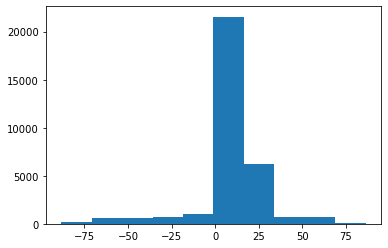

 8.13328     85
 9.96232     76
 8.17058     75
 18.01445    69
 15.13411    62
             ..
-2.14010      1
-3.45246      1
-14.60813     1
 1.30314      1
 2.57044      1
Name: glat, Length: 3780, dtype: int64

-----

glon


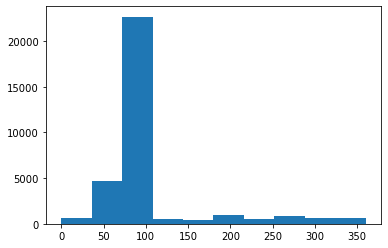

76.16130     85
80.53919     76
78.51990     75
79.90117     69
74.08669     62
             ..
127.80884     1
290.07159     1
303.78445     1
144.57834     1
4.70220       1
Name: glon, Length: 3780, dtype: int64

-----

pl_orbper


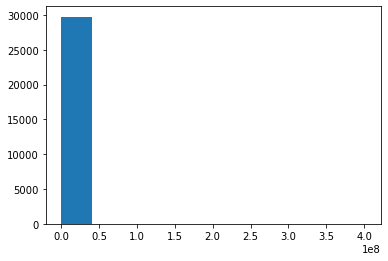

38.285634    6
7.794301     5
6.246680     5
1.541677     5
54.420541    5
            ..
9.070808     1
14.788400    1
6.212381     1
2.033881     1
12.022900    1
Name: pl_orbper, Length: 18778, dtype: int64

-----

sy_gaiamag


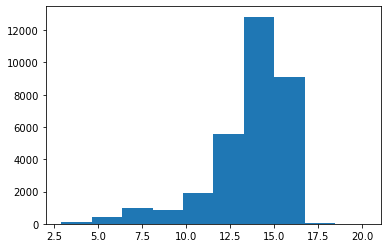

13.70620    85
15.81230    76
14.59940    75
15.90150    69
14.75550    62
            ..
7.32113      1
9.28610      1
7.74877      1
10.40550     1
10.60190     1
Name: sy_gaiamag, Length: 3518, dtype: int64

-----

pl_controv_flag


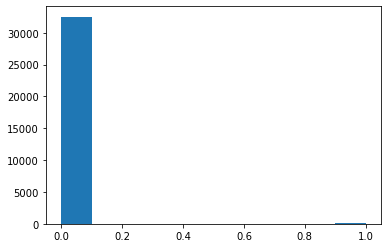

0    32504
1       48
Name: pl_controv_flag, dtype: int64

-----

pl_dens


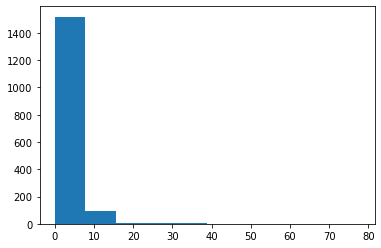

1.30000    16
0.80000    13
0.40000    11
0.38000    10
0.30000     9
           ..
0.39900     1
0.44400     1
1.67000     1
0.79800     1
0.62199     1
Name: pl_dens, Length: 850, dtype: int64

-----

pl_rade


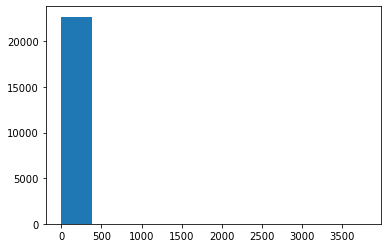

2.200    137
2.500    132
2.600    118
2.300    115
2.400    115
        ... 
5.160      1
1.364      1
2.159      1
9.992      1
3.251      1
Name: pl_rade, Length: 3705, dtype: int64

-----

pl_ratdor


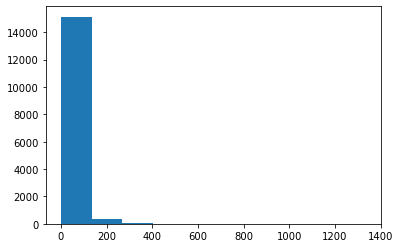

25.000000    40
27.000000    35
28.000000    33
23.000000    32
28.200000    23
             ..
11.268426     1
5.203693      1
27.966545     1
6.711000      1
23.226000     1
Name: pl_ratdor, Length: 4966, dtype: int64

-----

pl_masse


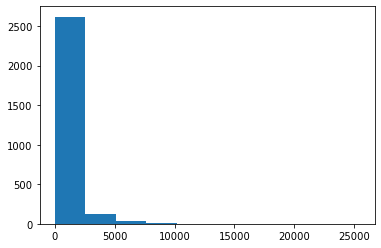

21.00000      19
15.20000       8
1200.00000     8
1.43000        8
3.90000        8
              ..
10.15000       1
10.30000       1
402.05495      1
2034.10180     1
1976.89269     1
Name: pl_masse, Length: 1941, dtype: int64

-----

st_teff


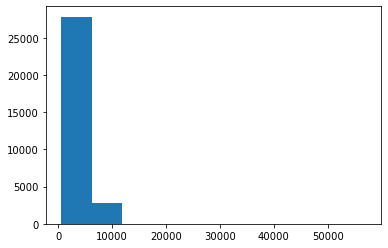

5900.00    81
5600.00    69
6063.00    56
5825.00    52
5741.00    52
           ..
7587.00     1
4337.00     1
4970.43     1
3807.22     1
5459.59     1
Name: st_teff, Length: 4062, dtype: int64

-----

st_met


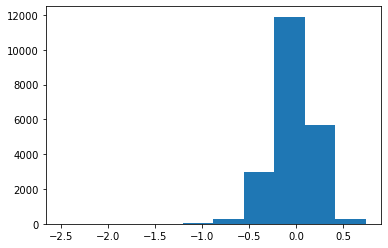

 0.000    747
 0.070    625
-0.020    589
-0.100    574
-0.140    530
         ... 
 0.227      1
 0.348      1
-0.710      1
 0.345      1
 0.298      1
Name: st_met, Length: 714, dtype: int64

-----

st_lum


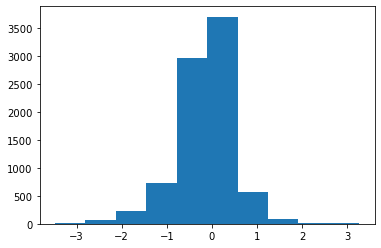

 0.430    39
 0.120    30
 0.467    28
-0.337    27
 0.079    26
          ..
-2.445     1
 0.929     1
 1.560     1
 0.619     1
-0.077     1
Name: st_lum, Length: 1693, dtype: int64

-----

st_logg


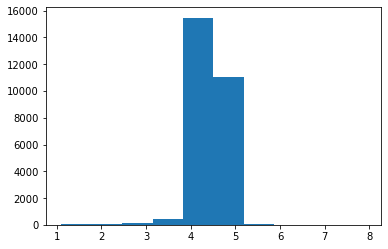

4.54    805
4.50    767
4.49    731
4.47    730
4.56    729
       ... 
2.45      1
1.10      1
2.22      1
2.37      1
5.07      1
Name: st_logg, Length: 299, dtype: int64

-----

st_age


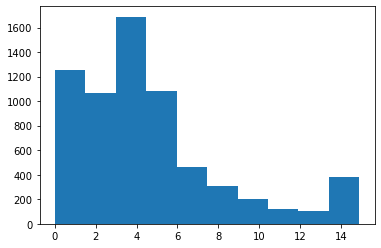

0.400     188
0.300     140
13.900    139
4.370     133
0.500     131
         ... 
10.650      1
3.460       1
1.850       1
0.919       1
2.910       1
Name: st_age, Length: 619, dtype: int64

-----

st_mass


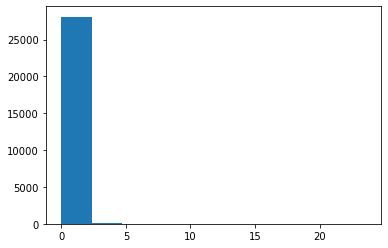

1.00    800
1.01    681
0.97    665
0.94    665
1.02    664
       ... 
3.70      1
3.21      1
2.42      1
3.16      1
2.03      1
Name: st_mass, Length: 259, dtype: int64

-----

st_dens


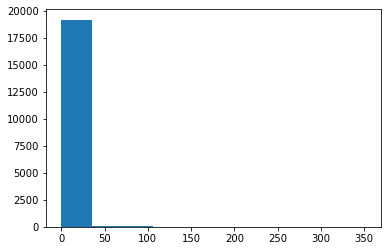

1.0271    23
1.4185    22
4.6592    20
0.4200    19
0.2995    18
          ..
2.7954     1
2.7808     1
1.5901     1
1.5302     1
1.7806     1
Name: st_dens, Length: 7451, dtype: int64

-----

st_rad


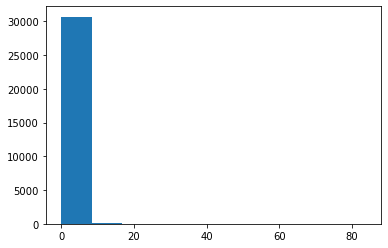

0.83     555
0.80     537
0.85     532
0.94     514
0.89     511
        ... 
2.61       1
11.02      1
21.40      1
14.10      1
3.53       1
Name: st_rad, Length: 545, dtype: int64

-----

sy_dist


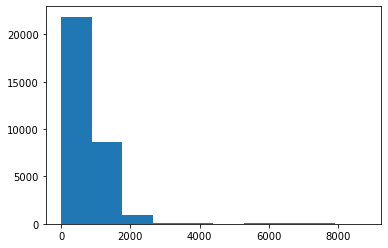

646.34600     85
323.84700     76
177.59400     75
848.25400     62
1209.16000    62
              ..
34.00710       1
33.22370       1
81.48930       1
5.03545        1
5830.00000     1
Name: sy_dist, Length: 3736, dtype: int64

-----

rowupdate


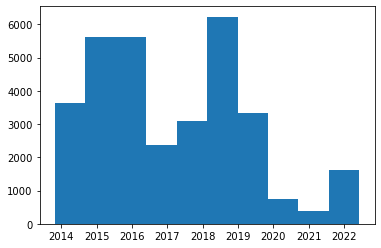

2018-09-25    2778
2014-11-21    2660
2017-05-08    2651
2015-08-25    2639
2014-11-18    2624
              ... 
2019-01-04       1
2021-09-09       1
2017-06-27       1
2021-03-01       1
2017-12-13       1
Name: rowupdate, Length: 344, dtype: int64

-----



In [14]:
for i in num_cols:
    print(i)
    chart = df[i].dropna()
    plt.hist(chart)
    plt.show()
    print(df[i].value_counts())
    print('\n-----\n')

Lots of outliers here!

Lemme check my categories (and get some ideas on how to bin/split):

In [15]:
def explore_univariate_categorical(train, cat_var):
    '''
    takes in a dataframe and a categorical variable and returns
    a frequency table and barplot of the frequencies. 
    '''
    frequency_table = freq_table(train, cat_var)
    plt.figure(figsize=(2,2))
    sns.barplot(x=cat_var, y='Count', data=frequency_table, color='lightseagreen')
    plt.title(cat_var)
    plt.show()
    print(frequency_table) 
    
def freq_table(train, cat_var):
    '''
    for a given categorical variable, compute the frequency count and percent split
    and return a dataframe of those values along with the different classes. 
    '''
    class_labels = list(train[cat_var].unique())

    frequency_table = (
        pd.DataFrame({cat_var: class_labels,
                      'Count': train[cat_var].value_counts(normalize=False), 
                      'Percent': round(train[cat_var].value_counts(normalize=True)*100,2)}
                    )
    )
    return frequency_table

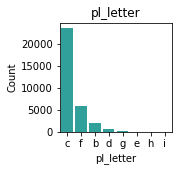

  pl_letter  Count  Percent
b         c  23614    72.54
c         f   5801    17.82
d         b   2114     6.49
e         d    726     2.23
f         g    235     0.72
g         e     40     0.12
h         h     21     0.06
i         i      1     0.00


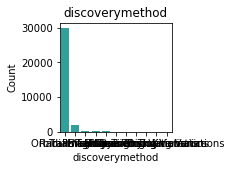

                                             discoverymethod  Count  Percent
Transit                                              Transit  29846    91.69
Radial Velocity                              Radial Velocity   2059     6.33
Microlensing                                         Imaging    359     1.10
Transit Timing Variations                      Pulsar Timing    118     0.36
Imaging                        Orbital Brightness Modulation    111     0.34
Eclipse Timing Variations                         Astrometry     24     0.07
Orbital Brightness Modulation                   Microlensing     19     0.06
Pulsar Timing                      Transit Timing Variations     12     0.04
Pulsation Timing Variations        Eclipse Timing Variations      2     0.01
Astrometry                       Pulsation Timing Variations      1     0.00
Disk Kinematics                              Disk Kinematics      1     0.00


In [16]:
for col in ['pl_letter', 'discoverymethod']:
    explore_univariate_categorical(df, col)

I'm so diligent, I'm gonna check to see if the binary flag is for just 2 or more planets

In [17]:
df[df.sy_snum > 2]

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet
16,HD 132563,b,3,1,0,Radial Velocity,2011,59.44282,74.89413,1544.000000,8.858210,0,NaN,NaN,NaN,NaN,6289.0,NaN,0.374,4.30,NaN,1.23,0.7977,1.30,105.15500,2019-01-28,HD 132563-b
24,GJ 667 C,b,3,5,0,Radial Velocity,2011,1.41002,351.84167,7.200660,9.380330,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.24396,2014-05-16,GJ 667 C-b
66,HD 207832,b,3,2,0,Radial Velocity,2012,-50.21556,24.00289,161.970000,8.611760,0,NaN,NaN,NaN,NaN,5710.0,NaN,-0.112,NaN,NaN,0.94,NaN,0.90,58.92910,2018-09-25,HD 207832-b
67,HD 207832,c,3,2,0,Radial Velocity,2012,-50.21556,24.00289,1155.700000,8.611760,0,NaN,NaN,NaN,NaN,5710.0,NaN,-0.112,NaN,NaN,0.94,NaN,0.90,58.92910,2015-09-08,HD 207832-c
70,KOI-13,b,3,1,0,Transit,2011,16.80645,77.50590,1.763589,10.367800,0,NaN,16.197,NaN,NaN,8511.0,NaN,NaN,NaN,NaN,2.05,NaN,1.76,519.09600,2014-09-18,KOI-13-b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30013,Kepler-444,b,3,5,0,Transit,2015,12.89062,73.36096,3.600105,8.643251,0,NaN,0.403,11.951,NaN,5046.0,-0.55,NaN,4.56,11.23,0.76,2.4930,0.75,36.43960,2015-01-29,Kepler-444-b
30134,WD 1856+534,b,3,1,0,Transit,2020,20.62284,83.49862,1.408052,16.958000,0,NaN,38.152,NaN,NaN,5780.0,NaN,NaN,4.44,NaN,NaN,NaN,1.00,24.73590,2021-10-29,WD 1856+534-b
30340,Kepler-444,d,3,5,0,Transit,2015,12.89062,73.36096,6.189372,8.643251,0,NaN,NaN,NaN,NaN,5058.0,-0.37,-0.425,4.56,NaN,0.84,2.3237,0.80,36.43960,2016-07-26,Kepler-444-d
30374,Kepler-444,f,3,5,0,Transit,2015,12.89062,73.36096,9.740486,8.643251,0,NaN,0.741,23.205,NaN,5046.0,-0.55,NaN,4.56,11.23,0.76,2.4930,0.75,36.43960,2015-01-29,Kepler-444-f


##### Looks like I will have to modify the cb_flag to include systems with 3 or 4 stars!

### So, for cleaning I have the following thoughts:
1. Remove all non-transit and radial velocty discovered (other methods have lots of nulls for other features).
    - Also, remove all pl_ctronvo_flag == 1
2. After removing the nulls from a given planet's multiple records, remove star ('hostname') and planet letter ('pl_letter') since they are captured in 'planet'
3. Encode sy_snum as binary/multiple and single.  Remove sy_snum and cb_flag
4. Remove glat and glon
5. Remove gaiamag - magnitude is a certain type of light at a certain distanc.  luminosity captures what I am really trying to get - how much em radiation it is putting out (freq of EM rad might have an effect, but for future analysis)
6. Combine planet factors into earthlike or not
    - Drop pl_ratdor
7. CLuster bin the luminositioes and else
    - Use a k-elbow to determine the best for these!
8. ***Check surface gravity vs others and then remove if possible
9. Cluster other solar factors
10. sy-distance: nice to bin?  yeah!
11. RENAME!

### 1. Remove all non-transit and radial velocty discovered

In [18]:
df.groupby('discoverymethod').sum()

,sy_snum,sy_pnum,cb_flag,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist
discoverymethod,,,,,,,,,,,,,,,,,,,,,,
Astrometry,1,1,0,2013,-6.82669,2.656164e+02,2.463600e+02,18.557700,0,0.00000,0.000,0.000000,9057.77000,0.000000e+00,0.000,0.000,0.00,1.000,0.07,0.0000,0.00,0.000000e+00
Disk Kinematics,1,1,0,2019,-15.91403,2.973700e+02,0.000000e+00,8.338670,0,0.00000,0.000,0.000000,794.57500,1.000000e+04,0.000,1.602,0.00,0.003,2.40,0.0000,2.25,1.838570e+02
Eclipse Timing Variations,49,44,24,48323,505.24921,3.841098e+03,8.784829e+04,335.014400,2,0.00000,0.000,0.000000,23739.11251,3.738120e+05,0.000,5.500,39.49,0.000,11.75,751.8096,1.39,8.668896e+03
Imaging,132,177,12,223313,-394.90676,2.738639e+04,4.201552e+08,988.504730,3,0.00000,664.230,0.000000,355564.85100,3.892497e+05,-2.207,-10.843,174.21,19.494,114.11,58.7545,56.59,7.839247e+03
Microlensing,376,380,9,724063,-795.38499,3.888058e+04,3.592200e+04,0.000000,0,0.00000,0.000,0.000000,203106.56429,1.186200e+04,-0.240,0.000,4.50,10.000,128.01,0.0000,0.00,1.542765e+06
Orbital Brightness Modulation,19,27,0,38270,194.67128,1.419785e+03,2.445855e+01,262.130800,5,2.36000,137.992,33.358200,1911.22330,2.252020e+05,-0.002,3.171,77.49,6.850,16.65,173.2541,20.37,1.841678e+04
Pulsar Timing,13,28,1,23988,560.65924,3.023945e+03,1.068532e+04,20.186100,0,24.84000,0.000,0.000000,1185.59500,4.500000e+03,0.000,0.000,0.00,23.100,9.79,0.0000,0.00,6.230000e+03
Pulsation Timing Variations,2,2,0,4023,-15.50925,1.610129e+02,2.010000e+03,27.698900,0,0.00000,0.000,0.000000,0.00000,3.636700e+04,-0.020,0.996,9.40,10.000,2.13,0.0000,0.23,2.578870e+03
Radial Velocity,2566,3924,3,4136513,3075.33592,3.701266e+05,1.985920e+06,15320.136008,15,164.16377,631.697,6052.083860,115547.12129,9.078357e+06,109.265,2.865,6187.25,3278.031,2113.44,721.9302,4598.30,1.435277e+05


In [19]:
df_sp1 = df.copy()
df = df[(df.discoverymethod == 'Transit') | (df.discoverymethod == 'Radial Velocity')]
df[df.discoverymethod == 'Pulsar Timing']

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,discoverymethod,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet


Now, the way the planet was discovered, along with the feautre details, is not important fo our study, so we can drop this column now that we've dropped the values it held we weren't interested in.

In [20]:
df = df.drop(columns = 'discoverymethod')
df.head()

,hostname,pl_letter,sy_snum,sy_pnum,cb_flag,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet
0,Kepler-11,c,1,6,0,2010,8.13328,76.16130,13.025020,13.70620,0,NaN,3.150,NaN,13.500,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c
1,Kepler-11,f,1,6,0,2010,8.13328,76.16130,46.688760,13.70620,0,NaN,2.610,NaN,2.300,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f
2,OGLE-TR-10,b,1,1,0,2004,-1.57666,359.85149,3.101278,15.68450,0,0.4,14.011,NaN,197.046,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b
3,HD 210702,b,1,1,0,2007,-32.02111,76.29345,354.290000,5.68070,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b
4,BD-08 2823,b,1,2,0,2009,34.75486,248.49513,5.600000,9.50331,0,NaN,NaN,NaN,NaN,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b


### 2. remove all pl_ctronvo_flag == 1

In [21]:
print(df.shape)
df = df[df.pl_controv_flag == 0]
df.shape
df = df.drop(columns='pl_controv_flag')

(31905, 26)


### 3. Encode sy_snum as binary/multiple and single. Remove sy_snum and cb_flag

In [22]:
df['multistar'] = np.where(df.sy_snum > 1, 1,0)
df = df.drop(columns = ['sy_snum','cb_flag'])
df.sample(5)

,hostname,pl_letter,sy_pnum,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
3708,K2-62,b,2,2016,-50.99807,47.74962,6.672020,12.04330,NaN,2.14,NaN,NaN,4880.00,NaN,NaN,4.60,NaN,0.77,NaN,0.73,112.4670,2016-07-14,K2-62-b,0
14059,HD 89744,b,1,1999,56.39325,178.39109,256.780000,5.60551,NaN,NaN,NaN,NaN,6291.00,0.260,NaN,NaN,NaN,1.56,NaN,NaN,38.6364,2019-03-11,HD 89744-b,1
5854,Kepler-921,b,1,2016,19.10488,79.19783,51.300634,14.70550,NaN,2.90,20.6,NaN,6032.00,-0.180,NaN,4.51,NaN,1.01,0.0632,0.93,934.4900,2015-08-25,Kepler-921-b,0
13979,HD 94834,b,1,2018,64.14605,213.12817,1576.000000,7.30241,NaN,NaN,NaN,NaN,4798.00,NaN,NaN,3.22,NaN,1.11,NaN,4.20,98.1609,2018-12-03,HD 94834-b,0
16808,Kepler-848,b,1,2016,13.71305,81.12202,6.911350,14.01050,NaN,NaN,NaN,NaN,5654.59,0.104,0.594,3.81,NaN,1.00,0.1604,2.06,1378.4700,2016-07-26,Kepler-848-b,0


### 4. Drop these two columns

In [23]:
df = df.drop(columns = 'hostname')
df
# Keep pl_letter since it indicates when a planets was found

,pl_letter,sy_pnum,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
0,c,6,2010,8.13328,76.16130,13.025020,13.70620,NaN,3.150,NaN,13.500,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c,0
1,f,6,2010,8.13328,76.16130,46.688760,13.70620,NaN,2.610,NaN,2.300,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f,0
2,b,1,2004,-1.57666,359.85149,3.101278,15.68450,0.4,14.011,NaN,197.046,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b,0
3,b,1,2007,-32.02111,76.29345,354.290000,5.68070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b,0
4,b,2,2009,34.75486,248.49513,5.600000,9.50331,NaN,NaN,NaN,NaN,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,b,3,2016,17.39614,75.59135,5.452987,12.39560,NaN,0.920,9.76,NaN,5450.0,0.10,NaN,4.56,NaN,0.94,0.5914,0.84,249.3430,2017-05-08,Kepler-1130-b,1
32545,b,1,2021,16.20448,69.94017,4.943285,12.67810,NaN,2.240,14.09,NaN,5759.0,-0.60,NaN,3.85,NaN,0.94,2.1664,1.92,328.0070,2014-11-18,Kepler-1933-b,0
32546,b,1,2021,10.56558,82.50797,3.720202,14.26010,NaN,1.030,14.75,NaN,5017.0,-0.02,NaN,4.52,NaN,0.76,4.3853,0.80,385.3480,2014-11-18,Kepler-1759-b,0
32547,c,3,2014,16.84340,74.07230,13.391552,10.54590,NaN,1.580,25.70,NaN,6197.0,-0.32,NaN,3.84,NaN,1.20,1.7806,2.19,267.3230,2017-05-08,Kepler-381-c,0


### 5. Remove glat and glong
- Didn;t give much insight since it is from earth, maybe next time

In [24]:
df = df.drop(columns = ['glat','glon'])
df.head()

,pl_letter,sy_pnum,disc_year,pl_orbper,sy_gaiamag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
0,c,6,2010,13.025020,13.70620,NaN,3.150,NaN,13.500,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c,0
1,f,6,2010,46.688760,13.70620,NaN,2.610,NaN,2.300,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f,0
2,b,1,2004,3.101278,15.68450,0.4,14.011,NaN,197.046,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b,0
3,b,1,2007,354.290000,5.68070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b,0
4,b,2,2009,5.600000,9.50331,NaN,NaN,NaN,NaN,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b,0


### 6. Give shakey deuce to magnitude
- Remove gaiamag - magnitude is a certain type of light at a certain distanc. luminosity captures what I am really trying to get - how much em radiation it is putting out (freq of EM rad might have an effect, but for future analysis)

In [25]:
df = df.drop(columns = 'sy_gaiamag')
df

,pl_letter,sy_pnum,disc_year,pl_orbper,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
0,c,6,2010,13.025020,NaN,3.150,NaN,13.500,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c,0
1,f,6,2010,46.688760,NaN,2.610,NaN,2.300,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f,0
2,b,1,2004,3.101278,0.4,14.011,NaN,197.046,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b,0
3,b,1,2007,354.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b,0
4,b,2,2009,5.600000,NaN,NaN,NaN,NaN,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,b,3,2016,5.452987,NaN,0.920,9.76,NaN,5450.0,0.10,NaN,4.56,NaN,0.94,0.5914,0.84,249.3430,2017-05-08,Kepler-1130-b,1
32545,b,1,2021,4.943285,NaN,2.240,14.09,NaN,5759.0,-0.60,NaN,3.85,NaN,0.94,2.1664,1.92,328.0070,2014-11-18,Kepler-1933-b,0
32546,b,1,2021,3.720202,NaN,1.030,14.75,NaN,5017.0,-0.02,NaN,4.52,NaN,0.76,4.3853,0.80,385.3480,2014-11-18,Kepler-1759-b,0
32547,c,3,2014,13.391552,NaN,1.580,25.70,NaN,6197.0,-0.32,NaN,3.84,NaN,1.20,1.7806,2.19,267.3230,2017-05-08,Kepler-381-c,0


##### Note: The better the early cleaning and discovery, as done here, the more rowsa re saved in the end, so we can CHOP off outliers like crazy.

### 7. Combine planet factors into earthlike or not
CLuster bin the luminositioes and else
Use a k-elbow to determine the best for these!
***Check surface gravity vs others and then remove if possible
Cluster other solar factors
sy-distance: nice to bin? yeah!
RENAME!

First, drop pl_ratdor.

Then, let's go ahead and drop all but planet radius to use as our earthlike target metric.

In [26]:
df = df.drop(columns=['pl_ratdor','pl_dens','pl_masse'])
df

,pl_letter,sy_pnum,disc_year,pl_orbper,pl_rade,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
0,c,6,2010,13.025020,3.150,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c,0
1,f,6,2010,46.688760,2.610,5680.0,0.00,NaN,4.30,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f,0
2,b,1,2004,3.101278,14.011,5950.0,NaN,0.188,NaN,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b,0
3,b,1,2007,354.290000,NaN,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b,0
4,b,2,2009,5.600000,NaN,4746.0,-0.07,NaN,4.13,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,b,3,2016,5.452987,0.920,5450.0,0.10,NaN,4.56,NaN,0.94,0.5914,0.84,249.3430,2017-05-08,Kepler-1130-b,1
32545,b,1,2021,4.943285,2.240,5759.0,-0.60,NaN,3.85,NaN,0.94,2.1664,1.92,328.0070,2014-11-18,Kepler-1933-b,0
32546,b,1,2021,3.720202,1.030,5017.0,-0.02,NaN,4.52,NaN,0.76,4.3853,0.80,385.3480,2014-11-18,Kepler-1759-b,0
32547,c,3,2014,13.391552,1.580,6197.0,-0.32,NaN,3.84,NaN,1.20,1.7806,2.19,267.3230,2017-05-08,Kepler-381-c,0


In [ ]:
# df['density_earths'] = df.pl_masse / df.pl_rade**3
# df.sample(10)

In [ ]:
# #Drop the original density column
# df = df.drop(columns= 'pl_dens')
# df.head()

In [ ]:
# #Make density the target, and then categorize it!
# df = df.drop(columns = ['pl_rade','pl_masse'])
# df.head()

#### You should just calculate density from radius and whatever and earths at 5.5 because you can eliminate a lot of nulls.
- .5 to 1.2 of the mass (gravity purposes, non uniform because higher gravity harder to adapt to)
- no density, rather radius: OR DENSTY IS THE ENTIRE MEASUREMENT! yes, let's use that because it captures the typical gravity for a earthlike planet which is 20% plus or minus 5.5!  This my big feature engeineer.  The target!!!!
- THE TARGET IS DENSITY OF PLANET!  WHICH DETERMINES EARTHLIKE STATUS.
Can drop the mass and the radius
Hold off on clustering until the nulls are gone and split has happened!

### Classify planets as such, using a clustering algorithm:
1. High Metallicity (superdense) planets (>1.2)
2. Earthlike (.8 - 1.2)
3. Soft (ice - 
4. Ice
5. Gas
## USE CLUSTERING TO DETERMINE THE EARTHLIKE ZONE? BY UISING K = 5

### 8. Stellar Gravity - Is this necessary with other factors?

st_logg = log(cm/s**2)

After exploration, determined that this was captured in stellar mass and radius so we can drop it.

In [27]:
df = df.drop(columns = 'st_logg')
df

,pl_letter,sy_pnum,disc_year,pl_orbper,pl_rade,st_teff,st_met,st_lum,st_age,st_mass,st_dens,st_rad,sy_dist,rowupdate,planet,multistar
0,c,6,2010,13.025020,3.150,5680.0,0.00,NaN,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-c,0
1,f,6,2010,46.688760,2.610,5680.0,0.00,NaN,8.0,0.95,NaN,1.10,646.3460,2014-05-16,Kepler-11-f,0
2,b,1,2004,3.101278,14.011,5950.0,NaN,0.188,NaN,1.14,NaN,1.17,1344.9700,2014-05-14,OGLE-TR-10-b,0
3,b,1,2007,354.290000,NaN,NaN,NaN,NaN,NaN,1.85,NaN,NaN,54.1963,2018-12-03,HD 210702-b,0
4,b,2,2009,5.600000,NaN,4746.0,-0.07,NaN,4.5,0.74,NaN,NaN,41.3342,2018-04-25,BD-08 2823-b,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,b,3,2016,5.452987,0.920,5450.0,0.10,NaN,NaN,0.94,0.5914,0.84,249.3430,2017-05-08,Kepler-1130-b,1
32545,b,1,2021,4.943285,2.240,5759.0,-0.60,NaN,NaN,0.94,2.1664,1.92,328.0070,2014-11-18,Kepler-1933-b,0
32546,b,1,2021,3.720202,1.030,5017.0,-0.02,NaN,NaN,0.76,4.3853,0.80,385.3480,2014-11-18,Kepler-1759-b,0
32547,c,3,2014,13.391552,1.580,6197.0,-0.32,NaN,NaN,1.20,1.7806,2.19,267.3230,2017-05-08,Kepler-381-c,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31867 entries, 0 to 32548
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pl_letter  31867 non-null  object        
 1   sy_pnum    31867 non-null  int64         
 2   disc_year  31867 non-null  int64         
 3   pl_orbper  29507 non-null  float64       
 4   pl_rade    22565 non-null  float64       
 5   st_teff    30442 non-null  float64       
 6   st_met     21057 non-null  float64       
 7   st_lum     8317 non-null   float64       
 8   st_age     6552 non-null   float64       
 9   st_mass    27563 non-null  float64       
 10  st_dens    19197 non-null  float64       
 11  st_rad     30616 non-null  float64       
 12  sy_dist    31136 non-null  float64       
 13  rowupdate  31867 non-null  datetime64[ns]
 14  planet     31867 non-null  object        
 15  multistar  31867 non-null  int64         
dtypes: datetime64[ns](1), float64(10), int64

## Transform using mean to get rid of most nulls

In [32]:
df_sp2 = df.copy()
df = df.groupby(df.planet).mean()
df.info()
df.head()

AttributeError: 'DataFrame' object has no attribute 'planet'

In [33]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4780 entries, 11 Com-b to xi Aql-b
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sy_pnum    4780 non-null   float64
 1   disc_year  4780 non-null   float64
 2   pl_orbper  4780 non-null   float64
 3   pl_rade    3880 non-null   float64
 4   st_teff    4710 non-null   float64
 5   st_met     4569 non-null   float64
 6   st_lum     3695 non-null   float64
 7   st_age     3748 non-null   float64
 8   st_mass    4764 non-null   float64
 9   st_dens    3614 non-null   float64
 10  st_rad     4607 non-null   float64
 11  sy_dist    4687 non-null   float64
 12  multistar  4780 non-null   float64
dtypes: float64(13)
memory usage: 522.8+ KB


,sy_pnum,disc_year,pl_orbper,pl_rade,st_teff,st_met,st_lum,st_age,st_mass,st_dens,st_rad,sy_dist,multistar
planet,,,,,,,,,,,,,
11 Com-b,1.0,2007.0,326.030000,NaN,4742.000,-0.350,2.2430,NaN,2.650000,NaN,19.000000,93.1846,1.0
11 UMi-b,1.0,2009.0,516.219985,NaN,4276.500,0.010,NaN,1.56,2.093333,NaN,26.935000,125.3210,0.0
14 And-b,1.0,2008.0,185.840000,NaN,4813.000,-0.240,1.7630,NaN,1.700000,NaN,11.000000,75.4392,0.0
14 Her-b,2.0,2002.0,1766.601670,NaN,5296.985,0.415,-0.1515,3.90,0.930000,1.2739,0.976667,17.9323,0.0
14 Her-c,2.0,2021.0,25000.000000,NaN,5314.940,0.405,NaN,NaN,0.970000,NaN,1.000000,17.9323,0.0


##### Hmm, this seems to indicate that I should be doing this part of it first (pulling star data for all columns!).  Aha! np.where or apply can assign a certain value to the other start columns...I think...

In [35]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, BD+20 594-b to XO-5-b
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sy_pnum    2747 non-null   float64
 1   disc_year  2747 non-null   float64
 2   pl_orbper  2747 non-null   float64
 3   pl_rade    2747 non-null   float64
 4   st_teff    2747 non-null   float64
 5   st_met     2747 non-null   float64
 6   st_lum     2747 non-null   float64
 7   st_age     2747 non-null   float64
 8   st_mass    2747 non-null   float64
 9   st_dens    2747 non-null   float64
 10  st_rad     2747 non-null   float64
 11  sy_dist    2747 non-null   float64
 12  multistar  2747 non-null   float64
dtypes: float64(13)
memory usage: 300.5+ KB


### 9. Time to bin star factors:
for non mvp, use clustering for all!  why not!  Just make it so it picks them close togegther
1. temperature (teff) (manually select)
2. metalicity (manually select)
3. age - DO NOT BIN!
4. mass - bin (manually based on science)
5. density - manually select

# HMM, Maybe planet radius is better, going to rerun with that.^^

In [46]:
df_sp1.groupby('hostname').mean()

,sy_snum,sy_pnum,cb_flag,disc_year,glat,glon,pl_orbper,sy_gaiamag,pl_controv_flag,pl_dens,pl_rade,pl_ratdor,pl_masse,st_teff,st_met,st_lum,st_logg,st_age,st_mass,st_dens,st_rad,sy_dist
hostname,,,,,,,,,,,,,,,,,,,,,,
11 Com,2.0,1.0,0.0,2007.000000,78.28058,264.13775,326.030000,4.44038,0.0,NaN,NaN,NaN,NaN,4742.000,-0.350000,2.2430,2.310,NaN,2.650000,NaN,19.0000,93.18460
11 UMi,1.0,1.0,0.0,2009.000000,41.04437,108.71900,516.219985,4.56216,0.0,NaN,NaN,NaN,NaN,4276.500,0.010000,NaN,1.765,1.560000,2.093333,NaN,26.9350,125.32100
14 And,1.0,1.0,0.0,2008.000000,-21.05141,106.41269,185.840000,4.91781,0.0,NaN,NaN,NaN,NaN,4813.000,-0.240000,1.7630,2.630,NaN,1.700000,NaN,11.0000,75.43920
14 Her,1.0,2.0,0.0,2004.375000,46.94447,69.16849,5085.658574,6.38300,0.0,NaN,NaN,NaN,NaN,5300.576,0.413333,-0.1515,4.422,3.900000,0.935714,1.2739,0.9825,17.93230
16 Cyg B,3.0,1.0,0.0,1996.000000,13.20446,83.33558,799.375000,6.06428,0.0,NaN,NaN,NaN,NaN,5728.594,0.056400,0.0970,4.344,NaN,1.016000,1.0110,1.1400,21.13970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tau Cet,1.0,4.0,0.0,2017.000000,-73.44240,173.07319,217.102500,3.24854,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.780000,NaN,NaN,3.60304
tau Gem,1.0,1.0,0.0,2013.000000,17.19879,187.21879,305.250000,4.03996,0.0,NaN,NaN,NaN,NaN,4435.000,0.140000,NaN,1.960,1.220000,2.300000,NaN,27.7600,112.53700
ups And,2.0,3.0,0.0,1997.894737,-20.66791,132.00045,483.619042,3.98687,0.0,NaN,NaN,NaN,3850.49115,6125.384,0.115200,0.5250,4.155,3.908571,1.257692,0.3699,1.6150,13.40540


# For this initial analysis, I did a lot of chopping - there were defintiely records lost that could be captured without loss of fidelity - i.e. capturing solar data from observations of other planets in the system.  But this is a good start!

In [49]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, BD+20 594-b to XO-5-b
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sy_pnum    2747 non-null   float64
 1   disc_year  2747 non-null   float64
 2   pl_orbper  2747 non-null   float64
 3   pl_rade    2747 non-null   float64
 4   st_teff    2747 non-null   float64
 5   st_met     2747 non-null   float64
 6   st_lum     2747 non-null   float64
 7   st_age     2747 non-null   float64
 8   st_mass    2747 non-null   float64
 9   st_dens    2747 non-null   float64
 10  st_rad     2747 non-null   float64
 11  sy_dist    2747 non-null   float64
 12  multistar  2747 non-null   float64
dtypes: float64(13)
memory usage: 300.5+ KB


In [51]:
from wrangle import outlier_destroyer

sy_pnum


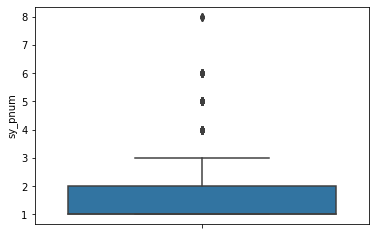

disc_year


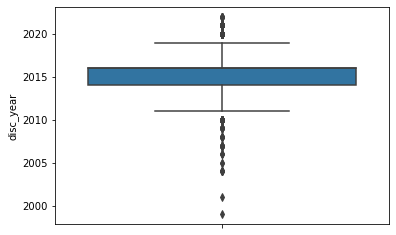

pl_orbper


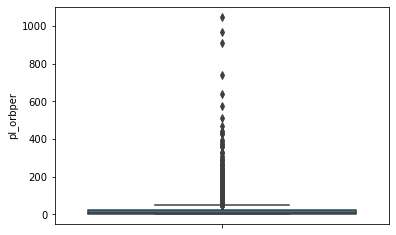

pl_rade


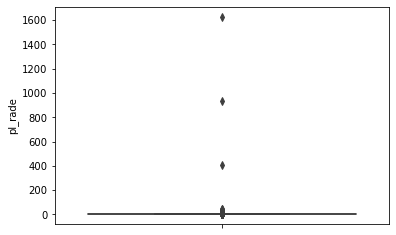

st_teff


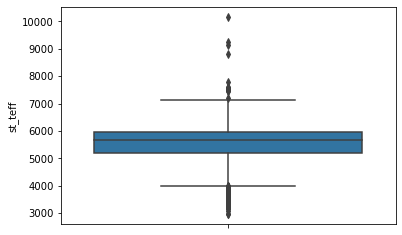

st_met


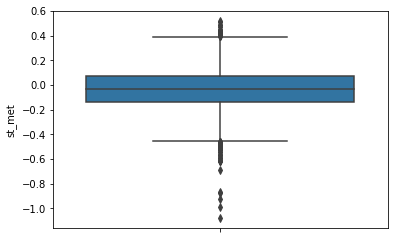

st_lum


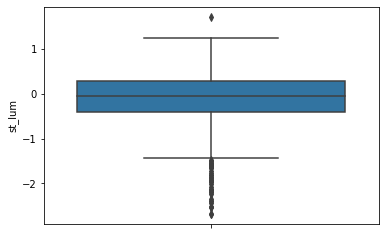

st_age


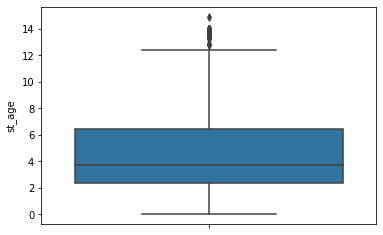

st_mass


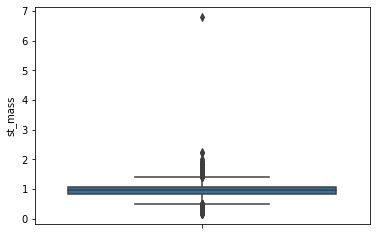

st_dens


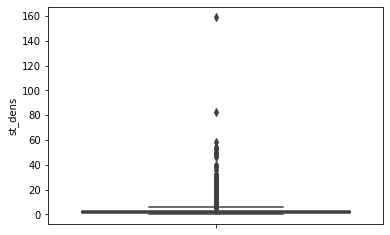

st_rad


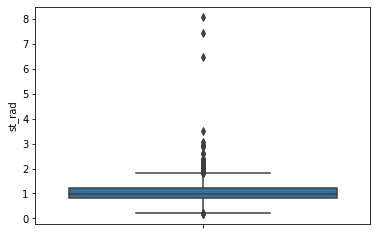

sy_dist


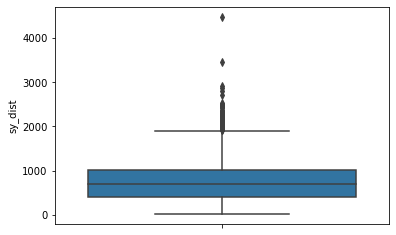

multistar


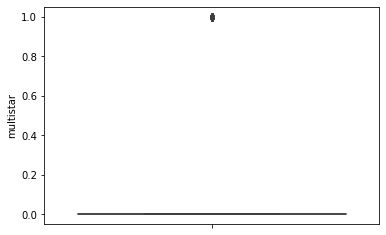

In [56]:
for col in df.columns:
    print(col)
    sns.boxplot(y = df[col])
    plt.show()

##### Rather than remove outliers, I will encode them using clustering and human selection techniques. AFTER THE SPLIT!

NExt Steps:
1. Create better names for the categoreis, maybe after number 2 below!
Also, change data types
2. Split the dataset and then use clustering and other to group the items.  Then apply those clusterings/groupings to the the validate and test! BEFORE ENCODING
3. Bivariate analaysis once this is all done.
4. Then model!

##### ALSO _ REMOVE YEAR FOUND, NOT IMPACTFUL ANYMORE

In [ ]:
df = df.drop(columns='disc_year')

In [60]:
df.sample(10)

,sy_pnum,pl_orbper,pl_rade,st_teff,st_met,st_lum,st_age,st_mass,st_dens,st_rad,sy_dist,multistar
planet,,,,,,,,,,,,
WASP-127-b,1.0,4.178062,15.025500,5724.005000,-0.186500,0.276,11.410,1.026667,0.579733,1.356667,159.507,1.0
Kepler-124-b,3.0,3.410467,0.893500,5124.888889,-0.504000,-0.467,1.260,0.760000,2.007220,0.684444,420.046,0.0
WASP-47-d,4.0,9.039658,3.436571,5603.142857,0.378000,0.032,6.500,1.034000,1.002900,1.088571,264.780,0.0
Kepler-1066-b,1.0,1.931559,2.450571,5604.208000,-0.042125,-0.190,8.250,0.914444,1.525571,0.957000,344.251,0.0
Kepler-1022-b,1.0,10.994695,2.001429,4318.700000,-0.340000,-0.858,8.765,0.623333,7.345743,0.630000,420.042,0.0
Kepler-812-b,1.0,10.117155,3.131571,6806.468000,-0.036875,0.752,1.225,1.412222,0.304957,1.658000,1482.740,0.0
Kepler-331-b,3.0,8.457484,2.116750,4456.154545,-0.379500,-0.784,2.220,0.637778,5.462200,0.588182,580.119,0.0
Kepler-29-c,2.0,13.287598,410.694444,5593.787500,-0.219300,-0.297,0.300,0.949091,2.134743,0.852500,832.532,0.0
Kepler-324-e,4.0,13.979426,1.728167,5274.250000,0.032000,-0.308,0.800,0.876250,31.322957,0.816250,501.574,0.0


## *Convert this all to a function in the wrangle file and run to start new scrapbook - clustering.*